# AI GENERATED IMAGE DETECTION

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchvision.transforms
from sklearn.model_selection import train_test_split

In [66]:
# Loading train dataset

In [62]:
loc = '/Users/suyashk11/Desktop/VLG_Project/train.csv'

In [63]:
train = pd.read_csv(loc)
train

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [4]:
x = train.iloc[:,1:]
x

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,-0.128052,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,-1.656990,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,0.848524,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,0.717341,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,0.778445,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,0.261597,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,1.243559,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,0.053378,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,0.725914,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [5]:
np.max(x)

5.347407283650381

In [6]:
y = train.iloc[:,0]
y

0       0
1       1
2       1
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: labels, Length: 5250, dtype: int64

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Columns: 1200 entries, f_0 to f_1199
dtypes: float64(1200)
memory usage: 48.1 MB


In [8]:
y.unique()

array([0, 1])

In [9]:
# There are therefore only 2 classes: 0 and 1

# Samples of Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


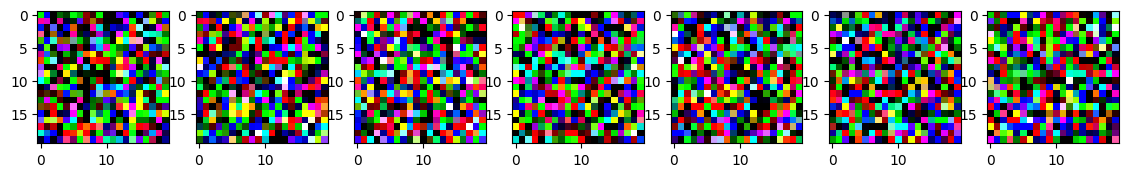

In [10]:
plt.figure(figsize=(16,16))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(20,20,3))

In [11]:
inp = x.values.reshape(len(x),3,20,20).astype(float)
inp

array([[[[-2.03387548e+00,  9.78445934e-01, -1.42130840e-01, ...,
           4.51839186e-02, -1.18505985e+00,  7.02962631e-01],
         [-2.11341350e-01,  5.54005961e-01, -2.32246408e-01, ...,
          -1.08685924e+00,  1.77964600e+00, -7.36181511e-02],
         [-8.19398547e-01,  1.18982846e+00, -2.76759061e-01, ...,
          -4.04319190e-01,  8.35058529e-01, -4.69971593e-01],
         ...,
         [ 3.58835701e-01, -3.71114769e-01,  2.19529610e-01, ...,
           2.98340909e-01,  3.88641751e-01,  1.70285248e-01],
         [ 8.24368325e-01, -1.02619639e+00,  5.41339477e-01, ...,
          -1.68739129e+00, -1.40592550e+00,  7.84179869e-01],
         [ 4.82840408e-01,  1.12786550e+00,  3.85343203e-01, ...,
           5.22258027e-01, -2.63701992e-01,  3.50990904e-02]],

        [[-6.82663228e-01,  1.14834470e+00, -5.43689863e-01, ...,
           7.49076388e-01, -2.26276593e+00, -7.89507976e-02],
         [ 9.65785202e-01,  2.59353471e-01, -1.59812846e-02, ...,
          -1.44469873e

# Building a CNN using torch

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3) #output 18*18*6
        self.pool= nn.MaxPool2d(2,2) #output 9*9*6
        self.conv2 = nn.Conv2d(6,12,3 , padding=1) #output 9*9*12
        self.hl1 = nn.Linear(81*12,243)
        self.hl2 = nn.Linear(243,122)
        self.hl3 = nn.Linear(122,61)
        self.hl4 = nn.Linear(61,2)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv2(x)
        x = torch.flatten(x,1)
        x = self.hl1(x)
        x = self.hl2(x)
        x = self.hl3(x)
        x = F.sigmoid(self.hl4(x))
        return x

In [13]:
net = Net()
lossfn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.00007)
num_epochs = 30

In [14]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (hl1): Linear(in_features=972, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)

In [15]:
batch_size = 64
loss_data = []
def training(num_epochs,inp):
    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_bar = tqdm(range(int(len(train) / batch_size)), desc=f'epoch {epoch + 1}')
        for i in epoch_bar:
            inputs = torch.from_numpy(inp[i:i+batch_size]).float()
            labels = torch.from_numpy(y.values[i:i+batch_size]).long()
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = lossfn(outputs.float(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            average_loss = running_loss / (i + 1)
        loss_data.append(average_loss)
        print(f"average_loss: {average_loss}")

training(num_epochs,inp)


epoch 1: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 136.35it/s]


average_loss: 0.6226867888031936


epoch 2: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 144.54it/s]


average_loss: 0.5189164368117728


epoch 3: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 143.61it/s]


average_loss: 0.34760033611844227


epoch 4: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 145.42it/s]


average_loss: 0.31855479246232565


epoch 5: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 145.36it/s]


average_loss: 0.3150343302546478


epoch 6: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 145.88it/s]


average_loss: 0.31408510847789484


epoch 7: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 146.06it/s]


average_loss: 0.31376471679385115


epoch 8: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 144.41it/s]


average_loss: 0.3136045769220445


epoch 9: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 144.56it/s]


average_loss: 0.3135127083557408


epoch 10: 100%|████████████████████████████████| 82/82 [00:00<00:00, 145.59it/s]


average_loss: 0.31345405047986563


epoch 11: 100%|████████████████████████████████| 82/82 [00:00<00:00, 146.45it/s]


average_loss: 0.31341387404174337


epoch 12: 100%|████████████████████████████████| 82/82 [00:00<00:00, 145.53it/s]


average_loss: 0.3133850039505377


epoch 13: 100%|████████████████████████████████| 82/82 [00:00<00:00, 146.55it/s]


average_loss: 0.31336351611265323


epoch 14: 100%|████████████████████████████████| 82/82 [00:00<00:00, 144.80it/s]


average_loss: 0.3133470685016818


epoch 15: 100%|████████████████████████████████| 82/82 [00:00<00:00, 144.72it/s]


average_loss: 0.31333418844676597


epoch 16: 100%|████████████████████████████████| 82/82 [00:00<00:00, 146.42it/s]


average_loss: 0.31332391754883093


epoch 17: 100%|████████████████████████████████| 82/82 [00:00<00:00, 144.67it/s]


average_loss: 0.313315592524482


epoch 18: 100%|████████████████████████████████| 82/82 [00:00<00:00, 147.37it/s]


average_loss: 0.3133087597969102


epoch 19: 100%|████████████████████████████████| 82/82 [00:00<00:00, 144.24it/s]


average_loss: 0.3133030802738376


epoch 20: 100%|████████████████████████████████| 82/82 [00:00<00:00, 145.82it/s]


average_loss: 0.3132983068140542


epoch 21: 100%|████████████████████████████████| 82/82 [00:00<00:00, 147.74it/s]


average_loss: 0.3132942722338002


epoch 22: 100%|████████████████████████████████| 82/82 [00:00<00:00, 136.47it/s]


average_loss: 0.31329081807194686


epoch 23: 100%|████████████████████████████████| 82/82 [00:00<00:00, 142.79it/s]


average_loss: 0.31328784547201016


epoch 24: 100%|████████████████████████████████| 82/82 [00:00<00:00, 138.81it/s]


average_loss: 0.3132852653904659


epoch 25: 100%|████████████████████████████████| 82/82 [00:00<00:00, 138.73it/s]


average_loss: 0.31328302331087066


epoch 26: 100%|████████████████████████████████| 82/82 [00:00<00:00, 132.83it/s]


average_loss: 0.3132810578113649


epoch 27: 100%|████████████████████████████████| 82/82 [00:00<00:00, 139.49it/s]


average_loss: 0.3132793278228946


epoch 28: 100%|████████████████████████████████| 82/82 [00:00<00:00, 141.87it/s]


average_loss: 0.3132777904591909


epoch 29: 100%|████████████████████████████████| 82/82 [00:00<00:00, 142.81it/s]


average_loss: 0.31327642645777726


epoch 30: 100%|████████████████████████████████| 82/82 [00:00<00:00, 142.24it/s]

average_loss: 0.3132752060163312


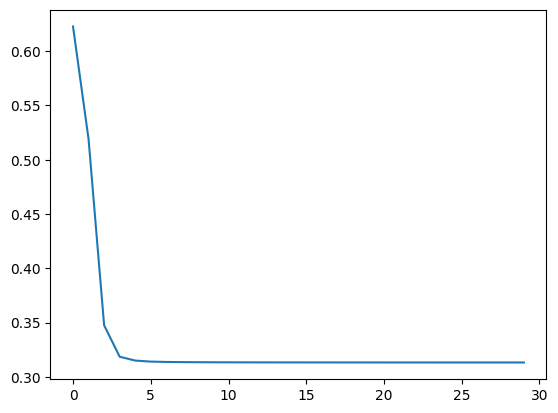

In [16]:
plt.plot(np.arange(num_epochs),loss_data)

In [17]:
torch.save(net.state_dict() , 'model.pt')

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [19]:
inp_test = torch.from_numpy(x_test.values.reshape(len(x_test),3,20,20).astype(float)).float()

# Checking Accuracy on Validation dataset

In [20]:
net.eval()
predictions = []
true_labels = []
with torch.no_grad():
        labels = y_test
        outputs = net(inp_test)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted)
        true_labels.extend(labels)

total = len(true_labels)
correct = sum(predictions[i] == true_labels[i] for i in range(total))
accuracy = correct / total

print(f"Accuracy: {accuracy}")

Accuracy: 0.7333333492279053


# Loading test dataset

In [65]:
testloc = '/Users/suyashk11/Desktop/VLG_Project/test.csv'
test = pd.read_csv(testloc)
test

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [26]:
test1 = test.drop(columns=['id'])
test_fin = test1.values.reshape(len(test1),3,20,20).astype(float)
test_fin

array([[[[-3.38824193e+00,  8.68284876e-01, -4.27619291e-01, ...,
          -1.29119790e+00, -1.39882245e+00, -5.25272165e-01],
         [-1.52564978e-01,  1.21368272e+00, -4.02020655e-01, ...,
           2.55732784e-01, -1.70922068e+00, -5.49284355e-01],
         [ 2.06688956e+00,  3.88765425e-01, -1.44693710e-01, ...,
           1.03884955e+00, -1.52987185e-01,  2.81214993e-01],
         ...,
         [-5.62406692e-02,  1.21702539e+00, -7.13128182e-01, ...,
           2.20709080e-01, -4.27619291e-01, -2.50925502e+00],
         [-1.07770342e+00, -1.67094553e+00, -3.05441395e-01, ...,
          -2.33071896e+00,  1.55156949e-02, -1.68456762e+00],
         [ 6.48868176e-01,  3.05437991e-01,  8.17039366e-01, ...,
          -1.77458673e+00, -4.42737526e-01,  1.01864919e+00]],

        [[ 2.73451191e+00,  3.54779318e-01,  6.31403327e-01, ...,
          -2.83163622e-01,  2.57552217e+00, -6.85827706e-01],
         [-1.49849079e-01, -2.78531117e+00,  7.51114261e-01, ...,
          -2.32237641e

In [46]:
result = torch.argmax(net(torch.from_numpy(test_fin).float()),axis=1)
result

tensor([0, 0, 0,  ..., 0, 0, 0])

# Result

In [57]:
result_df = pd.DataFrame(result.numpy(), columns = ['labels'])
result_df['id']=np.arange(len(result_df['labels']))
final_pred_cnn = result_df[['id','labels']]
final_pred_cnn

,id,labels
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2245,2245,0
2246,2246,0
2247,2247,0
2248,2248,0


In [61]:
final_pred_cnn.to_csv('/Users/suyashk11/Desktop/VLG_Project/cnnmodel_pred.csv')

# Observations:

Graph of epoch vs loss is drawn in above cell
* Net1 : 
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=2, bias=True)
)

hyperparameters : lr = 0.001 , epochs = 20 , batch_size = 64
average loss : 0.319

lr = 0.002 ==> loss = 0.324

lr = 0.003 ==> loss = 0.341

lr = 0.0005 ==> loss = 0.318

lr = 0.00013 ==> loss = 0.319

lr = 0.0001 ==> loss = 0.314

lr = 0.00007 ==> loss = 0.317

lr = 0.00025 ==> loss=0.343

lr = 0.0001 fixed : epochs=30 ==> loss = 0.313

batch size = 32 , lr =0.0001 , epochs = 20 ==> loss= 0.327

batch size = 32 , lr =0.0001 , epochs = 30 ==> loss= 0.321

batch_size = 128 ,lr=0.0001 , epochs = 30 , ==> loss = 0.326

best result : batchsize 64 , lr 0.0001 , epochs 30 

* Net2 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=2, bias=True)
)

hyperparameters :batch_size= 64 , lr= 0.0001 , epochs= 30 

loss ==> 0.314

* Net3 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)

hyperparameters :batch_size= 64 , lr= 0.0001 , epochs= 30 

loss ==> 0.313

* RestNet50 loss = 7.786 (too high)


* Net4 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (hl1): Linear(in_features=588, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)
hyperparameters : batch_size = 64 , epochs = 30 , lr = 0.0001 ==> loss = 0.313
lr = 0.00015 ==> loss = 0.314
lr = 0.00007 ==> loss = 0.315

* Net5 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (hl1): Linear(in_features=972, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)
hyperparameters : batch_size = 64 , epochs = 30 , lr = 0.0001 ==> loss = 0.312 (Best Result till now)